# <center>Aston University <br/><br/> CS3IVP: Image and Video Processing <br/><br/> Lab 04: First ASSESSED Lab - Group 1</center>

Academic year: 2025-2026 <br/>
<br/>
Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>




## Instructions
Submission is required for this laboratory. Please fill in your answers and submit the completed notebook (*.ipynb file) on blackboard in the section `Assessment Submission` and `Week 4 - Assessed Lab 1`.

**You have 40 minutes to complete this assessment, that is 5 minutes before the end of your session.** 

We added some leeway for upload/submission issues, so the deadline on blackboard is a bit later. Following advice:
- make sure to submit the correct file, and
- make sure it is correctly submitted, and
- submit your work on time.

Your work will be subject to lateness penalty if submitted late. The lab has been designed so that it can be completed in 40 minutes to ensure that you have time to check your submission by the end of the session. There is a total of 20 marks per lab.

You are welcome to browse online documentation if necessary, but **you must not collaborate with others in any way**.

## Task 4.1

- <span style="color:#aa0000; font-family: monospace;">**Define**</span> a Numpy 3x3 matrix with random values.
- Print the matrix.
- The diagonal from the top left corner to the bottom right corner of a square matrix is called the **main diagonal or leading diagonal.** Use a python `for` loop to increase the values of the main diagonal of the previously defined matrix by 1.
- Print the final matrix.


Given your knowledge of **Lab 1** , this task should be straightforward.

<span style="color:#aa0000; font-family: monospace;">**[6 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the matrices are not printed**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the matrix does not contain random numbers**</span>



In [1]:
import numpy as np

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

# create a 3x3 matrix with random values
arr = np.random.random((3,3))
# print the original matrix
print(f'3x3 matrix:\n{arr}')

# increase the values on the main diagonal by 1
for i in range(3):
    arr[i, i] = arr[i, i] + 1

# print the modified matrix
print(f'\nMatrix after increasing main diagonal by 1:\n {arr}')

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)


3x3 matrix:
[[0.17323239 0.04007859 0.47363215]
 [0.16678303 0.46668044 0.37984356]
 [0.81326381 0.02984425 0.07773216]]

Matrix after increasing main diagonal by 1:
 [[1.17323239 0.04007859 0.47363215]
 [0.16678303 1.46668044 0.37984356]
 [0.81326381 0.02984425 1.07773216]]


## Task 4.2a
<span style="color:#aa0000; font-family: monospace;">**Write**</span> a Python function `threshold_transform`:
 - It must take a grey image matrix and a `threshold` as arguments and return an image of the same shape and type.
 - The function must return an image with the values below the `threshold` value sent to black and all above or equal to it sent to white.
 - The images passed as arguments must be arrays, not the paths of the images on the file system.
 - The solution must not contain loops.

This task tests your knowledge of **Global Image Enhancement** and vectorised operations on numpy arrays.

Remember to return an image of type `np.uint8`, as otherwise the image will be displayed using the default float-to-colour map. To change the type of the arrays you can use the NumPy array method `astype`.

<span style="color:#aa0000; font-family: monospace;">**[5 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the solution contains loops,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the input image is modified,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if the returned image type is not `np.uint8`,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if the argument is a path rather than an image.**</span>

Advice, only in case you are having difficulties:
- In Python, as in Java, parameters are usually references ([except for immutable objects](https://docs.python.org/3/faq/programming.html#how-do-i-write-a-function-with-output-parameters-call-by-reference)). Because of this, you should work on a copies of the images, and avoid modifying any input image (except in very specific cases where that is the desired behaviour). You can create a copy of a given image using the `np.array` constructor. For instance: `tmp = np.array(input_image)`.
- You can write the function and the code in the cell below. If you do not feel too confident writing Python functions, before writing the function, it may be easier for you to write the code inside it with a fixed threshold. Once you have the code working for a specific value, you can make it a function. (As usual, focus on one problem at a time!)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow


# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def threshold_transform(image, threshold):
    # convert to numpy array
    tmp = np.array(image)

    # apply threshold
    result = np.where(tmp >= threshold, 255, 0)
    
    # result
    return result.astype(np.uint8)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 4.2b
<span style="color:#aa0000; font-family: monospace;">**Apply**</span> your function to `image1_1.bmp`, from the test images on Blackboard, with a threshold value of $140$. <span style="color:#aa0000; font-family: monospace;">**Display**</span> the input image and the resulting image in the same cell.

<span style="color:#aa0000; font-family: monospace;">**[2 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if more than one cell is used**</span>

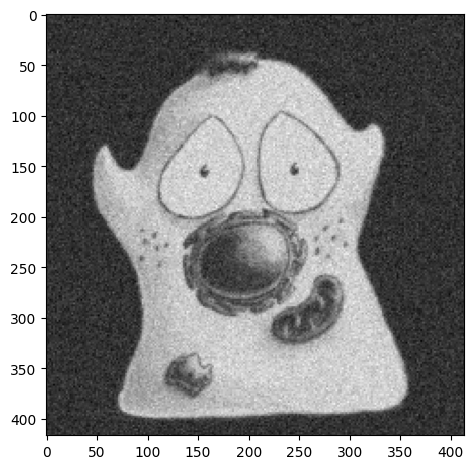

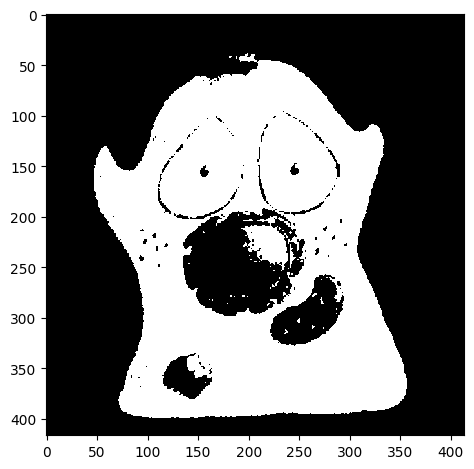

In [4]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

image = imread('image1_1.bmp')
image_out = threshold_transform(image, 140)

imshow(image)
plt.figure()
imshow(image_out)

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 4.3

Take a look at `image2_1.bmp` from the test images on Blackboard. It contains circles and squares with different gray values. The objective of this task is to **isolate the circles while preserving their grey values**. All other regions (background and rectangular objects) should be set to zero (black).

<span style="color:#aa0000; font-family: monospace;">**Write**</span> a Python function `intensity_slicing`:
 - It must take a grey image matrix and a `threshold` as arguments and return an image of the same shape and type.
 - The function must return an image with the values either below or above the threshold sent to black. Decide whether it is below or above based on your picture and the objective.
 - The images passed as arguments must be arrays, not the paths of the images on the file system.
 - The solution must not contain loops.
 - The returned image should be a copy, so that the original image is not modified.

<span style="color:#aa0000; font-family: monospace;">**Find**</span> a suitable threshold:
 - Apply your function to the given image.
 - Display the input image and the resulting image in the same cell.
 - Adjust the threshold such that in the resulting image all circles are preserved and everything else is black.

This tests your knowledge of **Global Image Enhancement** and vectorised operations on numpy arrays **(see Lecture 02 and Lab 03)**.

Remember to return an image of type `np.uint8`, as otherwise the image will be displayed using the default float-to-colour map. To change the type of the arrays you can use the NumPy array method `astype`.

<span style="color:#aa0000; font-family: monospace;">**[7 marks]**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the solution contains loops,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 marks if the input image is modified,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if the returned value is not `np.uint8`,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-2 marks if argument is a path rather than an image,**</span>
 - <span style="color:#aa0000; font-family: monospace;">**-1 mark if the found threshold does not correctly isolate the circles.**</span>


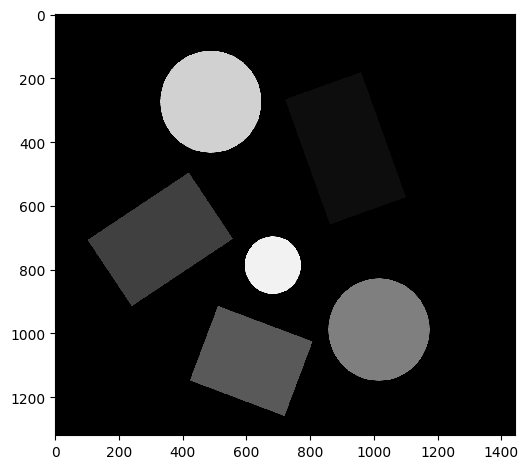

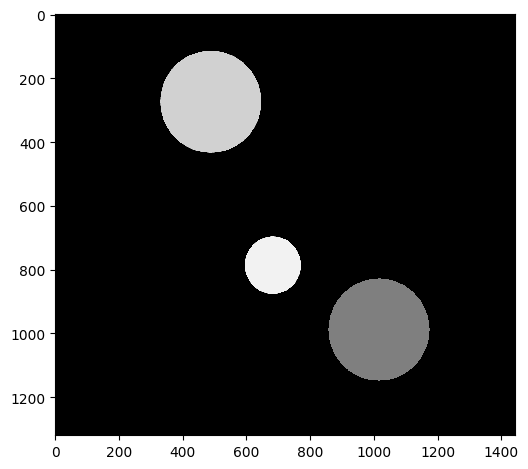

In [34]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def intensity_slicing(image, threshold):
    tmp = np.array(image)
    result = np.where(tmp>=threshold, tmp, 0)
    return result.astype(np.uint8)

image = imread('image2_1.bmp', as_gray=True)

image_out = intensity_slicing(image, 100)
imshow(image)
plt.figure()
imshow(image_out)

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

## End of lab 04

You finished this lab. Don't forget to submit your jupyter notebook on blackboard. See instructions at the top of this notebook.